In [20]:
import numpy as np
import pandas as pd
import matplotlib as mp
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

heart_data =  pd.read_csv("heart_disease.csv")
heart_data['ONE'] = 1
map_once = 0
drop_once = 0 ## Use the two above values to avoid dropping and mappiung data multiple times later on if the code cell is rerun

In [13]:
heart_data

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,40,1,0,0,0,0,15,1,0,9
1,0,0,0,25,1,0,0,1,0,0,0,0,7
2,0,1,1,28,0,0,0,0,0,30,1,0,9
3,0,1,0,27,0,0,0,1,0,0,0,0,11
4,0,1,1,24,0,0,0,1,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,45,0,0,0,0,0,5,0,1,5
253676,0,1,1,18,0,0,2,0,0,0,1,0,11
253677,0,0,0,28,0,0,0,1,0,0,0,0,2
253678,0,1,0,23,0,0,0,0,0,0,0,1,7


Text(0, 0.5, 'Total')

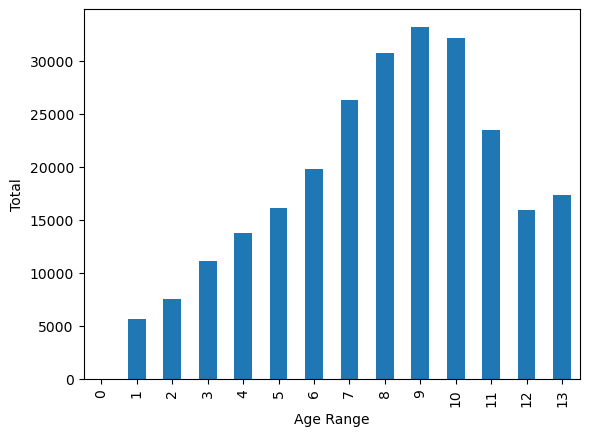

In [16]:
# Seperating the data to see the breakdown of ages in the dataset.

# "Age : Indicates the age class of the person, where 1 is 18 years 
# to 24 years up till 13 which is 80 years or older, each interval 
# between has a 5-year increment."


bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
ranges = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
heart_data['Age_Range'] = pd.cut(heart_data['Age'], bins=bins, labels=ranges, right=False)

age_total = heart_data.groupby("Age_Range")["ONE"].sum()
age_total.plot(kind='bar')
plt.xlabel('Age Range')
plt.ylabel('Total')


In [18]:
# Finding the most populous age group

age_sum = heart_data.groupby('Age_Range')['Age_Range'].agg(['count']).reset_index()
age_sum

,Age_Range,count
0,0,0
1,1,5700
2,2,7598
3,3,11123
4,4,13823
5,5,16157
6,6,19819
7,7,26314
8,8,30832
9,9,33244


In [23]:
male_occ = heart_data.loc[heart_data['Sex'] == 1, 'HeartDisease'].sum()
male_occ

male_tot = heart_data.loc[heart_data['Sex'] == 1, 'ONE'].sum()
male_tot

fem_occ = heart_data.loc[heart_data['Sex'] == 0, 'HeartDisease'].sum()
fem_occ

fem_tot = heart_data.loc[heart_data['Sex'] == 0, 'ONE'].sum()
fem_tot

male_perc = male_occ/male_tot

fem_perc = fem_occ/fem_tot


print('Male Percentage:', format(male_perc,'.2%'))
print('Female Percentage:', format(fem_perc,'.2%'))

Male Percentage: 12.25%
Female Percentage: 7.19%


1


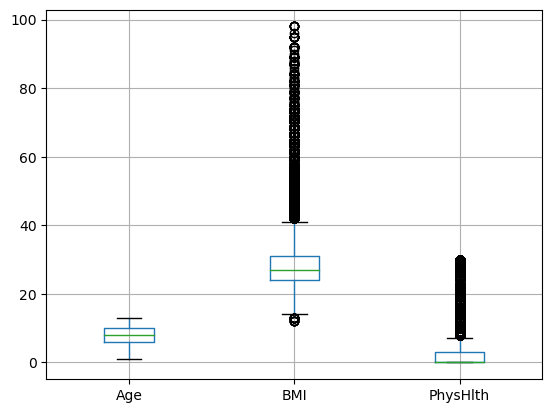

In [32]:
data_nums = heart_data.filter(['Age','BMI', 'PhysHlth'])

boxPlot = data_nums.boxplot()
boxPlot

print(heart_data['HighChol'].max() - heart_data['HighChol'].min())

In [26]:
# Finding any missing data in the dataset

heart_data.isnull().sum()

HeartDisease         0
HighBP               0
HighChol             0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
HvyAlcoholConsump    0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
ONE                  0
dtype: int64

In [35]:
# Finding any categorical data in the dataset
# Only detailed what I believe to be relevant columns

print(heart_data.nunique())

print('HeartDisease:',heart_data['HeartDisease'].unique())
print( 'HighBP:', heart_data['HighBP'].unique())
print( 'HighChol:', heart_data['HighChol'].unique())
print( 'BMI:', heart_data['BMI'].unique())
print( 'Smoker:', heart_data['Smoker'].unique())
print( 'Stroke:', heart_data['Stroke'].unique())
print('Diabetes:', heart_data['Diabetes'].unique())
print( 'PhysActivity:', heart_data['PhysActivity'].unique())
print( 'HvyAlcoholConsump:', heart_data['HvyAlcoholConsump'].unique())
print( 'PhysHlth:', heart_data['PhysHlth'].unique())
print( 'Sex:', heart_data['Sex'].unique())
print('Age:', heart_data['Age'].unique())


HeartDisease          2
HighBP                2
HighChol              2
BMI                  84
Smoker                2
Stroke                2
Diabetes              3
PhysActivity          2
HvyAlcoholConsump     2
PhysHlth             31
DiffWalk              2
Sex                   2
Age                  13
ONE                   1
dtype: int64
HeartDisease: [0 1]
HighBP: [1 0]
HighChol: [1 0]
BMI: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker: [1 0]
Stroke: [0 1]
Diabetes: [0 2 1]
PhysActivity: [0 1]
HvyAlcoholConsump: [0 1]
PhysHlth: [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
Sex: [0 1]
Age: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]


In [ ]:
Building the MLA

In [46]:
features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
            'Diabetes', 'PhysActivity', 'HvyAlcoholConsump',
            'PhysHlth', 'DiffWalk', 'Sex', 'Age']

target_variable = 'HeartDisease'

# Prepare inputs and outputs
inputs = heart_data[features].values
outputs = heart_data[target_variable].astype(int)

# Split the data
in_tr, in_te, out_tr, out_te = train_test_split(inputs, outputs, test_size=.5, random_state=42)

# Initialize the Decision Tree Classifier
tree_d = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                                min_samples_leaf=10, min_samples_split=3, splitter='best', random_state=42)

# Fit the model
tree_d.fit(in_tr, out_tr)

# Make predictions
prediction = tree_d.predict(in_te)

# Evaluate the model
accuracy = accuracy_score(out_te, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.91


[[114726    250]
 [ 11483    381]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    114976
           1       0.60      0.03      0.06     11864

    accuracy                           0.91    126840
   macro avg       0.76      0.51      0.51    126840
weighted avg       0.88      0.91      0.87    126840



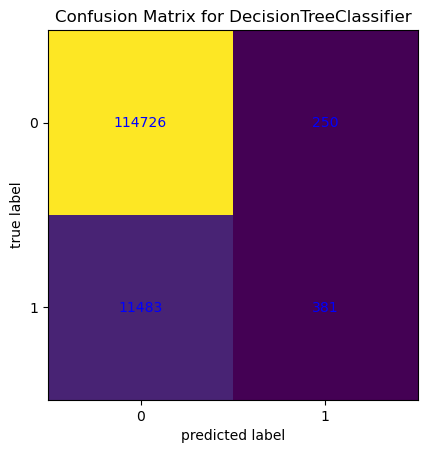

In [47]:
matrix = confusion_matrix(out_te, prediction)

print(confusion_matrix(out_te, prediction))

def cf_matrix(mat, tree_d, model_name):
    
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    
    ax.set_xticks(range(0,len(tree_d)))
    ax.set_yticks(range(0,len(tree_d)))
    ax.set_xticklabels(tree_d)
    ax.set_yticklabels(tree_d)

    for i in range(0,len(tree_d)):
        for j in range(0,len(tree_d)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="b")
    
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.title(f"Confusion Matrix for {model_name}")
    
cf_matrix(matrix,[0,1],'DecisionTreeClassifier')

print(classification_report(out_te, prediction))

|--- HighBP <= 0.50
|   |--- Age <= 8.50
|   |   |--- DiffWalk <= 0.50
|   |   |   |--- Age <= 5.50
|   |   |   |   |--- Stroke <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Stroke >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  5.50
|   |   |   |   |--- Stroke <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Stroke >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- DiffWalk >  0.50
|   |   |   |--- Stroke <= 0.50
|   |   |   |   |--- PhysHlth <= 14.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PhysHlth >  14.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Stroke >  0.50
|   |   |   |   |--- Smoker <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Smoker >  0.50
|   |   |   |   |   |--- class: 0
|   |--- Age >  8.50
|   |   |--- Sex <= 0.50
|   |   |   |--- DiffWalk <= 0.50
|   |   |   |   |--- Age <= 11.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  11.50
|   |   |   |   |   |--- clas

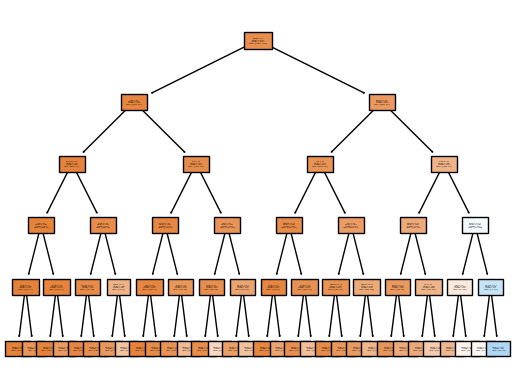

In [49]:
feature_names=['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
            'Diabetes', 'PhysActivity', 'HvyAlcoholConsump',
            'PhysHlth', 'DiffWalk', 'Sex', 'Age']

tree_p = tree.plot_tree(tree_d,fontsize=1, filled=True,feature_names=feature_names)

tree_t = tree.export_text(tree_d,feature_names=feature_names)
print(tree_t)

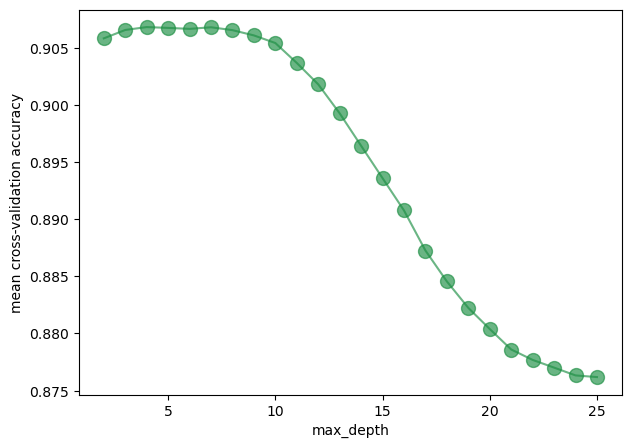

In [51]:
depths = range(2,26)
scores = list()


for i in depths:
    tree_alts = DecisionTreeClassifier(max_depth = i, random_state=42)
    score = cross_val_score(tree_alts, inputs, outputs, cv=3, scoring='accuracy')

    mean_score = score.mean()
    scores.append(mean_score)
    
plt.figure(figsize=(7,5))
plt.plot(depths, scores, '-o',markersize=10,alpha=0.65,color='#1b8e42')
plt.xlabel('max_depth')
plt.ylabel('mean cross-validation accuracy')
plt.show()

In [55]:
heart_data.head()

,HeartDisease,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,PhysHlth,DiffWalk,Sex,Age,ONE
0,0,1,1,40,1,0,0,0,0,15,1,0,9,1
1,0,0,0,25,1,0,0,1,0,0,0,0,7,1
2,0,1,1,28,0,0,0,0,0,30,1,0,9,1
3,0,1,0,27,0,0,0,1,0,0,0,0,11,1
4,0,1,1,24,0,0,0,1,0,0,0,0,11,1


In [80]:
new_sample = np.array([1, 1, 40, 1, 0, 1, 0, 1, 1, 1, 1, 7]).reshape(1, -1)

# Use the trained model to make a prediction
prediction = tree_d.predict(new_sample)
    
probability = tree_d.predict_proba(new_sample)

# The probabilities are returned as an array, where the first element is the probability of class 0 and the second is the probability of class 1
probability_heart_disease = probability[0, 1]

# Print the probability
print(f"Probability of having heart disease: {probability_heart_disease:.2%}")

Probability of having heart disease: 24.45%
